<h1><font color = 'orange'> [Phạm Thanh Nam] - Data-marketing-Portuguese-banking
 <font></h1>


## Meta data
Input variables:
### bank client data:
1 - **`age`** (numeric)

2 - **`job`** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - **`marital`** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - **`education`** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - **`default`**: has credit in default? (categorical: 'no','yes','unknown')

6 - **`housing`**: has housing loan? (categorical: 'no','yes','unknown')

7 - **`loan`**: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:

8 - **`contact`**: contact communication type (categorical: 'cellular','telephone')

9 - **`month`**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - **`day_of_week`**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - **`duration`**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:

12 - **`campaign`**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - **`pdays`**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - **`previous`**: number of contacts performed before this campaign and for this client (numeric)

15 - **`poutcome`**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes

16 - **`emp.var.rate`**: employment variation rate - quarterly indicator (numeric)

17 - **`cons.price.idx`**: consumer price index - monthly indicator (numeric)

18 - **`cons.conf.idx`**: consumer confidence index - monthly indicator (numeric)

19 - **`euribor3m`**: euribor 3 month rate - daily indicator (numeric)

20 - **`nr.employed`**: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - **`y`** - has the client subscribed a term deposit? (binary: 'yes','no')



In [ ]:
# import lib
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
print("import done!!!")

import done!!!


In [ ]:
# Import data

#bank_df_local = pd.read_csv(r'C:\Users\ADMIN\Desktop\Viettle_test\bank.csv')

url='https://drive.google.com/file/d/1PhPoriS1qCLDJDyCQIMNDRfOak1Uwo86/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

bank_df = pd.read_csv(dwn_url, sep = ';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#thông tin chung
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#đọc shape của data
bank_df.shape

(41188, 21)

In [ ]:
# thống kê các cột thiếu bao nhiêu giá trị
for col in bank_df.columns:
    missing_data = bank_df[col].isna().sum()
    missing_percent = missing_data/len(bank_df)*100
    print(f"Column {col}: has {missing_percent} % missing_data")

Column age: has 0.0 % missing_data
Column job: has 0.0 % missing_data
Column marital: has 0.0 % missing_data
Column education: has 0.0 % missing_data
Column default: has 0.0 % missing_data
Column housing: has 0.0 % missing_data
Column loan: has 0.0 % missing_data
Column contact: has 0.0 % missing_data
Column month: has 0.0 % missing_data
Column day_of_week: has 0.0 % missing_data
Column duration: has 0.0 % missing_data
Column campaign: has 0.0 % missing_data
Column pdays: has 0.0 % missing_data
Column previous: has 0.0 % missing_data
Column poutcome: has 0.0 % missing_data
Column emp.var.rate: has 0.0 % missing_data
Column cons.price.idx: has 0.0 % missing_data
Column cons.conf.idx: has 0.0 % missing_data
Column euribor3m: has 0.0 % missing_data
Column nr.employed: has 0.0 % missing_data
Column y: has 0.0 % missing_data


In [ ]:
bank_df.describe() #thống kê đầy đủ cả df: include='all'

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Độ tuổi trung bình trong bộ data set là 40 

## Data Wrangling

#### Kiểm tra xem data set có null/nan ko

In [ ]:
bank_df.isnull().values.any()

False

In [ ]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#kiểu dữ liệu trong bộ data
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<h1><font color = 'orange'> EDA: Exploratory Data Analysis <font></h1>

### Tương quan giữa các biến numberic

Các biến thuộc nhóm social and economic context attributes

In [ ]:
#tính tương quan giữa các biến numberic trong data
bank_corr = bank_df.corr()
bank_corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


hàm one_like để tạo matrix của các toán tử boonleans (true,fasle)

In [ ]:
#ones_like build a matrix of booleans with out data
ones_corr = np.ones_like(bank_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [ ]:
# xem shape của 2 bảng data
ones_corr.shape, bank_corr.shape

((10, 10), (10, 10))

In [ ]:
# np's triu: hàm lấy 1 nửa tam giác của ma trận trên
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

<AxesSubplot:>

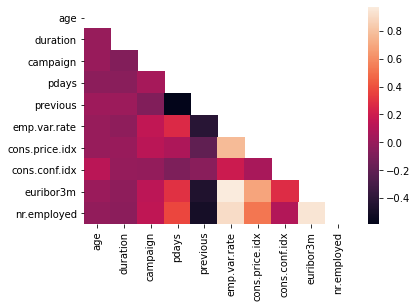

In [ ]:
# vẽ heatmap
sns.heatmap(data=bank_corr, mask=mask)

In [ ]:
# Bỏ các cột age và nr.employed để visual đẹp hơn
adjust_mask = mask[1:, :-1]
adjust_mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False, False]])

In [ ]:
adjust_bank_corr = bank_corr.iloc[1: ,:-1]

Text(0.0, 1.0, 'CORRELATION MATRIX\nBANK FEATURES COMPOSITION\n')

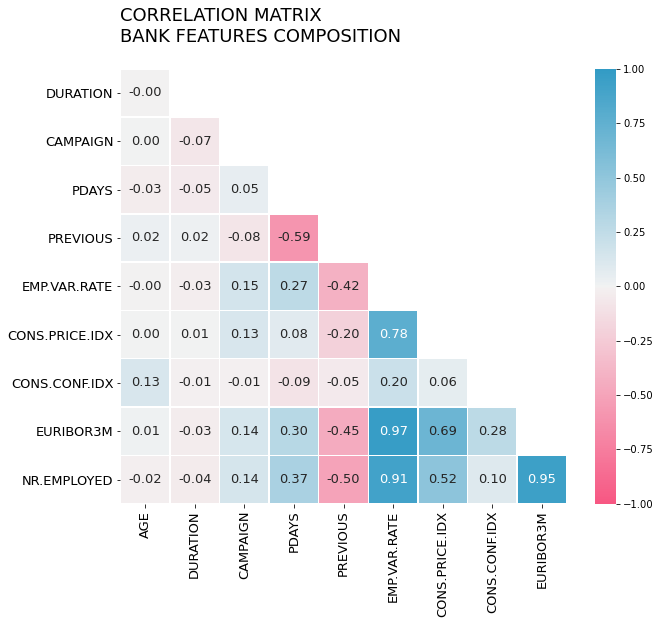

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

#tạo bảng màu HUSL (Hsluv.org)
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True) 

sns.heatmap(data=adjust_bank_corr, mask=adjust_mask,
           annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap =cmap,
           vmin=-1, vmax=1,
           linecolor='white',linewidths=0.5);

yticks = [i.upper() for i in adjust_bank_corr.index]
xticks = [i.upper() for i in adjust_bank_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);

title = 'CORRELATION MATRIX\nBANK FEATURES COMPOSITION\n'
ax.set_title(title, loc='left',fontsize=18)
#plt.savefig('ccorrr.svg') 

Qua biểu đồ ở trên ta có thể thấy các features thuộc bối cảnh kinh tế xã hội có liên quan trực tiếp đến nhau. Ví dụ như: 
 + `emp.var.rate` (tỷ lệ biến động việc làm) tương quan với `cons.price.idx` (chỉ số giá tiêu dùng), `euribor3m` (lãi suất chào bán liên ngân hàng euribor) và nr.employed (số lượng nhân viên).
 + `cons.price.idx` (chỉ số giá tiêu dùng) cũng tương quan với `euribor3m` (lãi suất chào bán liên ngân hàng euribor) và `nr.employed` (số lượng nhân viên).
 + `euribor3m` (lãi suất chào bán liên ngân hàng euribor) có sự tương quan lớn với `nr.employed` (số lượng nhân viên).

In [ ]:
from scipy import stats

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [ ]:
pearson_coef, p_value = stats.pearsonr(bank_df['cons.price.idx'], bank_df['emp.var.rate'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.775334170835007  with a P-value of P = 0.0


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# bank client data:

Text(0.5, 0, 'y')

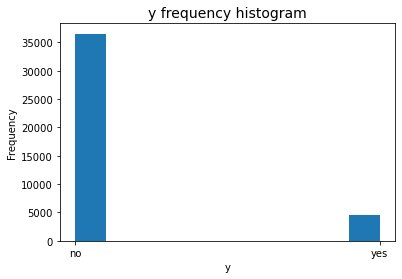

In [ ]:
# Tỷ lệ khách hàng đồng ý tham gia đăng kí tiền gửi khách hàng có kì hạn
a = bank_df['y']
plt.hist(a)
plt.title('y frequency histogram', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('y', fontsize=10)

In [ ]:
bank_df['y'].value_counts()*0.001


no     36.548
yes     4.640
Name: y, dtype: float64

<AxesSubplot:ylabel='y'>

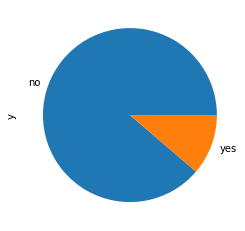

In [ ]:
bank_df['y'].value_counts().plot.pie()

Số khách hàng đồng ý ít hơn số khách hàng từ chối dịch vụ

Text(0.5, 0.98, 'Age frequency')

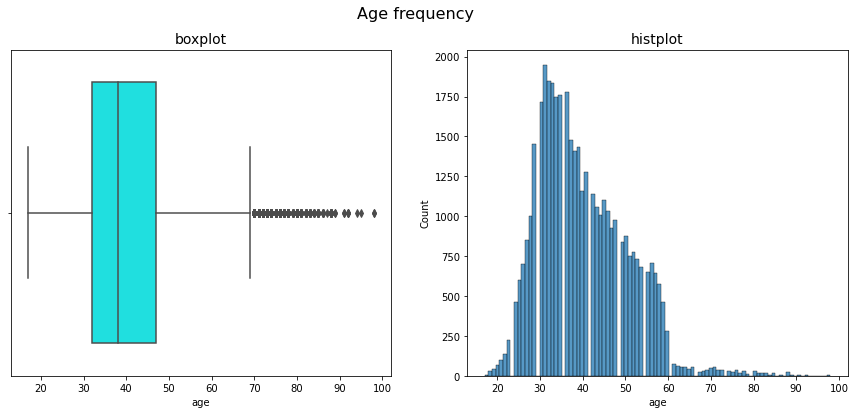

In [ ]:
# Tuổi của khách hàng 

#xác định vùng vẽ biểu đồ (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(15,6))

#create boxplot in each subplot
sns.boxplot(x = bank_df['age'], color='cyan', ax=axes[0])
axes[0].set_title('boxplot', fontsize=14)
sns.histplot(bank_df['age'], ax=axes[1])
axes[1].set_title('histplot', fontsize=14)
fig.suptitle('Age frequency', fontsize=16)

Ta có thể thấy độ tuổi phổ biến trong data chương trình tiền gửi có kỳ hạn ngân hàng nhiều nhất trong khoảng từ 30 đến 48 tuổi - ta có thể thấy đây là độ tuổi lao động chính trong xã hội. Ngoài ra có các trường hợp đặc biệt trong data là trên 70 tuổi. 

In [ ]:
# Công việc phổ biến nhất của khách hàng
bank_df['job'].value_counts().to_frame()

,job
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


<AxesSubplot:xlabel='job', ylabel='count'>

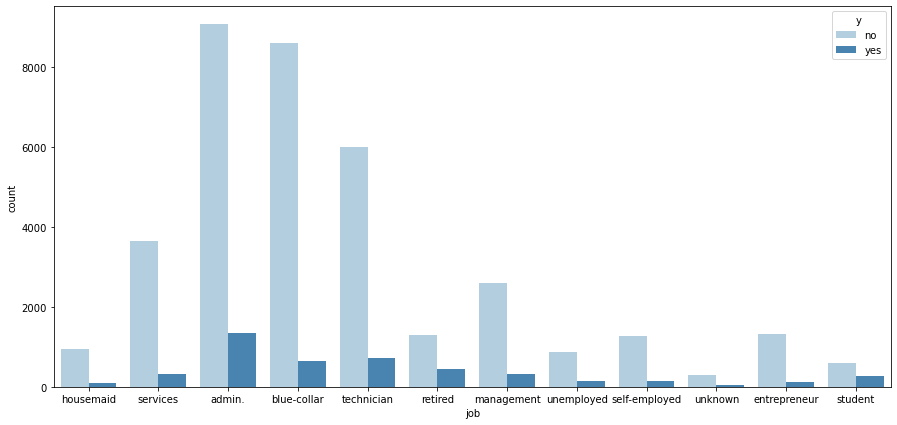

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data = bank_df, x = 'job', hue = 'y', palette = 'Blues' )

**admin.** là công việc phổ biến nhất trong tập dữ liệu khách hàng và cũng tham gia vào chương trình tiền gửi nhiều nhất. Thấp nhất là **học sinh, sinh viên** và **các ngành nghề khác.**

Text(0.5, 0, 'marital')

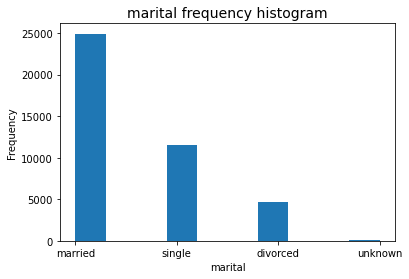

In [ ]:
# Tình hình hôn nhân
a = bank_df['marital']
plt.hist(a)
plt.title('marital frequency histogram', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('marital', fontsize=10)

<AxesSubplot:xlabel='marital', ylabel='count'>

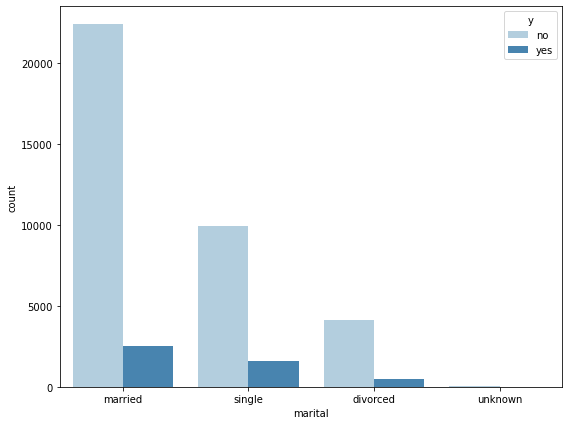

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
sns.countplot(data = bank_df, x = 'marital', hue = 'y', palette = 'Blues' )

In [ ]:
# % tình trạng hôn nhân
bank_df["marital"].value_counts(normalize = True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

Tỉ lệ đã có gia đình trong tập khách hàng khá cao chiếm khoảng 60%. Tập hợp khách hàng này thường hướng đến trách nhiệm và tính ổn định lâu dài. Vì vậy nhu cầu của nhưng khách hàng này là quan tâm đến các khoảng tiết kiệm và lãi suất tiền gửi trong kỳ.

In [ ]:
# Tình trạng học vấn
bank_df['education'].value_counts().to_frame()


,education
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


Tình trạng học vấn của khách hàng trong bộ data set đa phần đã có bằng đại học

<AxesSubplot:xlabel='education', ylabel='count'>

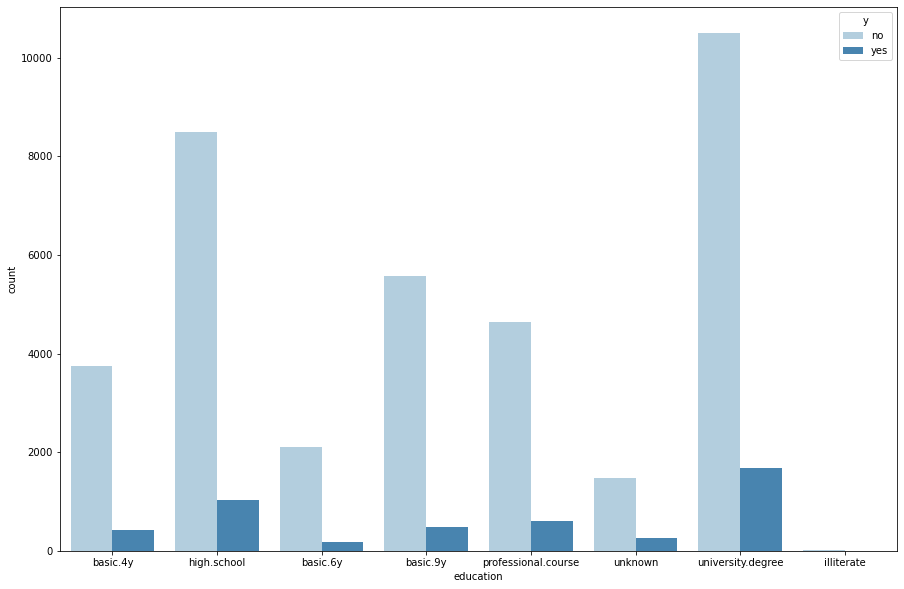

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data = bank_df, x = 'education', hue = 'y', palette = 'Blues' )

Các khách hàng có bằng đại học cũng tham gia đăng kí chương trình tiền gửi nhiều hơn

<AxesSubplot:xlabel='default', ylabel='count'>

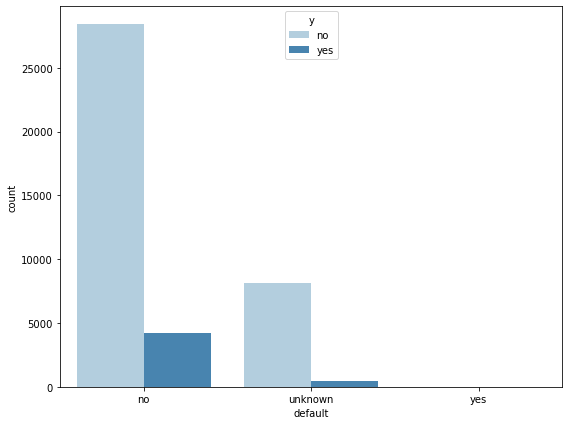

In [ ]:
# Có tín dụng trong tình trạng vỡ nợ
fig, ax = plt.subplots(figsize=(9,7))
sns.countplot(data = bank_df, x = 'default', hue = 'y', palette = 'Blues' )

Tệp khách hàng đã được lọc kĩ từ đầu vào nên gần như ko có khách hàng vỡ nợ tín dụng

<AxesSubplot:xlabel='housing', ylabel='count'>

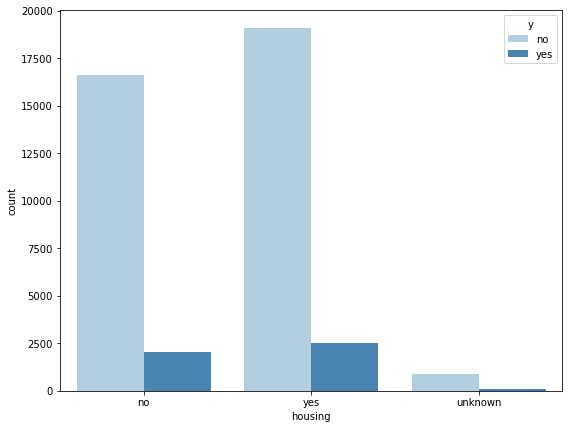

In [ ]:
# Có cho vay mua nhà
fig, ax = plt.subplots(figsize=(9,7))
sns.countplot(data = bank_df, x = 'housing', hue = 'y', palette = 'Blues' )

Tỉ lệ khách hàng tham gia chương trình hoặc không khi có khoảng vay mua nhà có tỉ lệ tương đương với nhau.

<AxesSubplot:xlabel='loan', ylabel='count'>

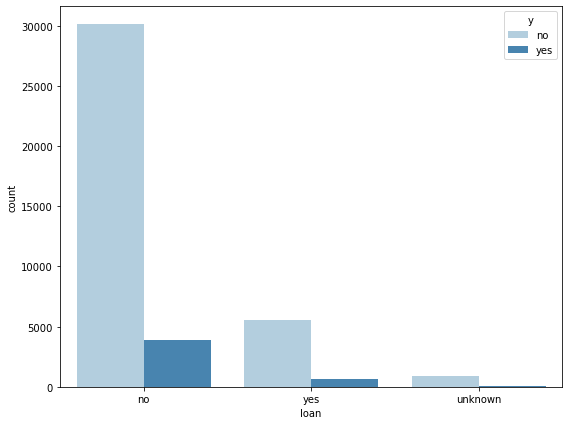

In [ ]:
# khách hàng có khoảng nay cá nhân
fig, ax = plt.subplots(figsize=(9,7))
sns.countplot(data = bank_df, x = 'loan', hue = 'y', palette = 'Blues' )

Các khách hàng tham gia chương trình thường không có các khoảng vay các nhân do họ đang tìm đến những chương trình gửi tiết kiệm

## related with the last contact of the current campaign:

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:xlabel='contact', ylabel='count'>

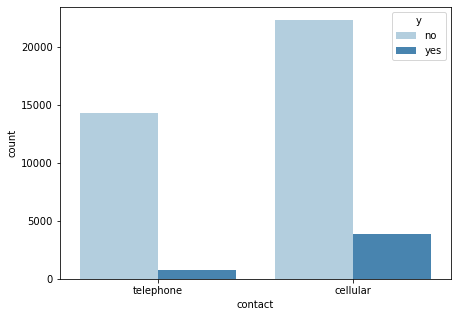

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data = bank_df, x = 'contact', hue = 'y', palette = 'Blues' )

Số lượng khách hàng liên lạc bằng điện thoại di động nhiều hơn lượt khác hàng sử dụng máy cố định

<AxesSubplot:xlabel='month', ylabel='count'>

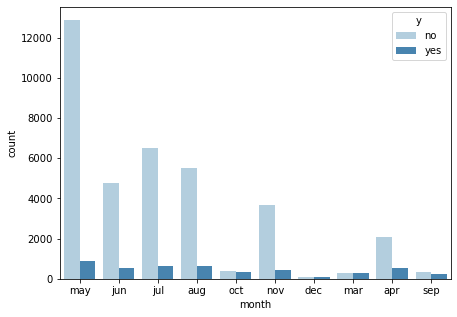

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data = bank_df, x = 'month', hue = 'y', palette = 'Blues' )

Người dùng có xu hướng đăng kí tham gia nhiều nhất vào tháng 4 đến tháng 8

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

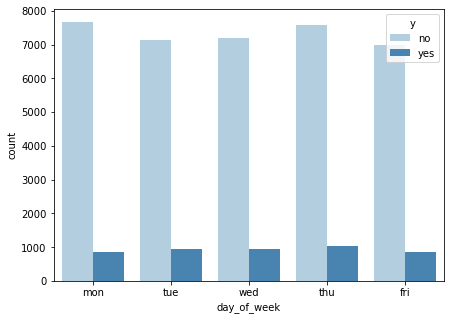

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data = bank_df, x = 'day_of_week', hue = 'y', palette = 'Blues' )

Thời gian người dùng đăng kí dịch vụ tiền gửi kì hạn ngân hàng trong 1 tuần là như nhau

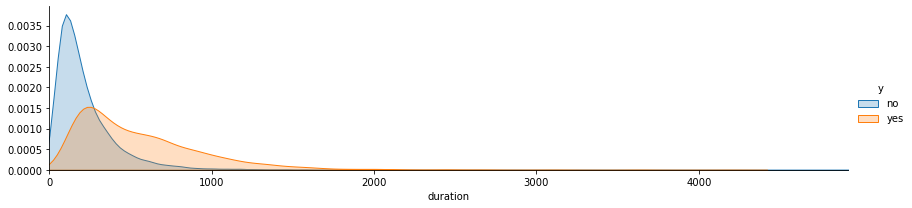

In [ ]:
# Duration
fig = sns.FacetGrid(bank_df, hue="y",aspect=4)
fig.map(sns.kdeplot,'duration',shade= True)
oldest = bank_df['duration'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Thời lượng liên lạc:
- duration: thời lượng liên lạc cuối cùng, tính bằng giây (số). Lưu ý quan trọng: thuộc tính này ảnh hưởng nhiều đến mục tiêu đầu ra (ví dụ: nếu thời lượng = 0 thì y = 'không'). Tuy nhiên, thời lượng không được biết trước khi thực hiện cuộc gọi. Ngoài ra, sau khi kết thúc cuộc gọi, y hiển nhiên được biết đến. Do đó, đầu vào này chỉ nên được đưa vào cho mục đích chuẩn và nên bị loại bỏ nếu mục đích là có một mô hình dự đoán thực tế.

# other attributes:

Text(0.5, 0, 'campaign')

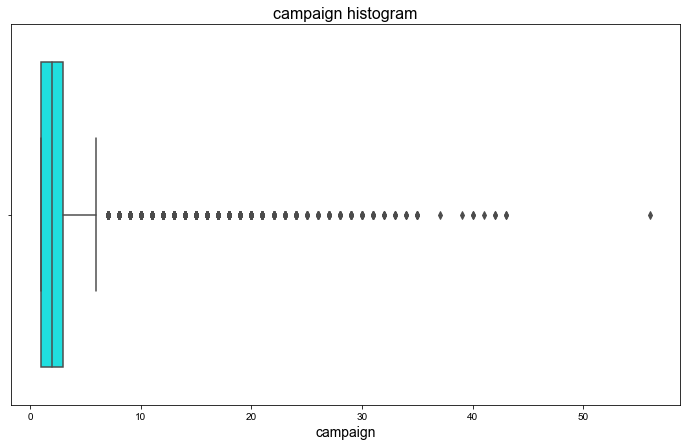

In [ ]:
# chiến dịch 
fig, ax = plt.subplots(figsize=(12,7))
sns.set_theme(style="darkgrid")
boxplot = sns.boxplot(x = bank_df['campaign'], color='cyan') #Cyan, skyblue
boxplot.axes.set_title("campaign histogram", fontsize=16)
boxplot.set_xlabel("campaign", fontsize=14)

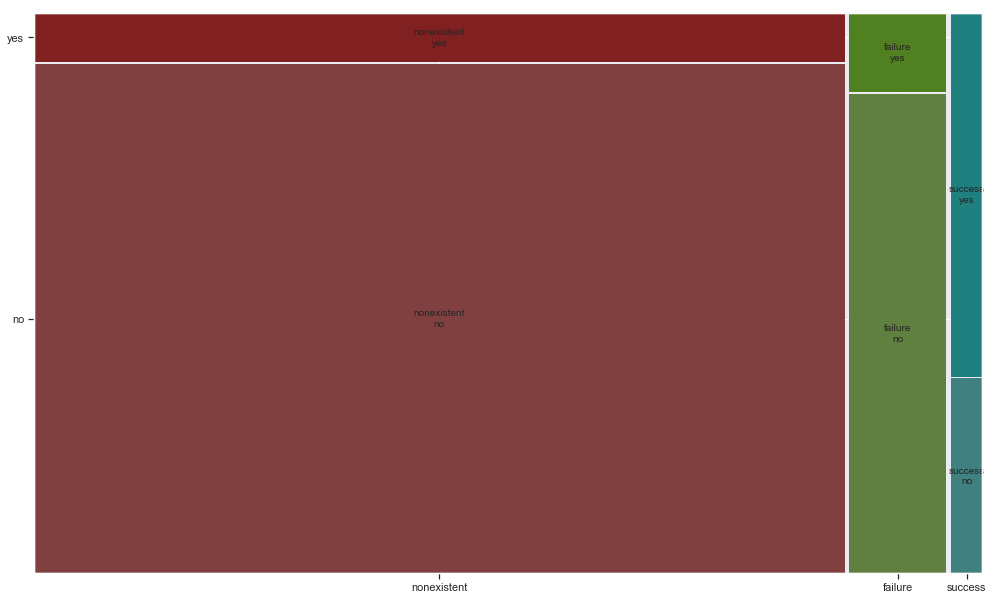

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams["figure.figsize"] = [14.00, 8.50]
plt.rcParams["figure.autolayout"] = True
mosaic(data=bank_df, index=['poutcome', 'y'])
plt.show()

Các chiến dịch marketing thành công mang đến số khách hàng đồng ý đăng kí tham gia dịch vụ.

Text(0.5, 0, 'pdays')

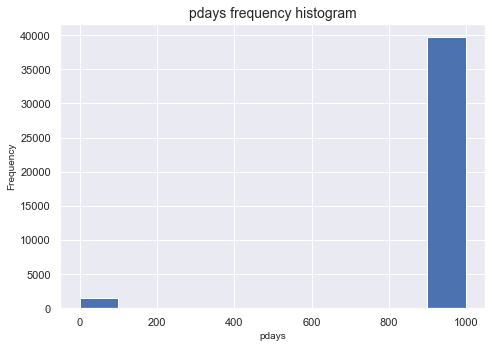

In [ ]:
#pdays
fig, ax = plt.subplots(figsize=(7,5))

a = bank_df['pdays']
plt.hist(a)
plt.title('pdays frequency histogram', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('pdays', fontsize=10)

In [ ]:
bank_df['pdays'].value_counts().to_frame()

,pdays
999,39673
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52
5,46


Số khách hàng trong bộ dữ liệu đa phần chưa được liên hệ trước đó và đều là các data mới.

In [ ]:
bank_df['previous'].value_counts().to_frame()

,previous
0,35563
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


Text(0.5, 0, 'previous')

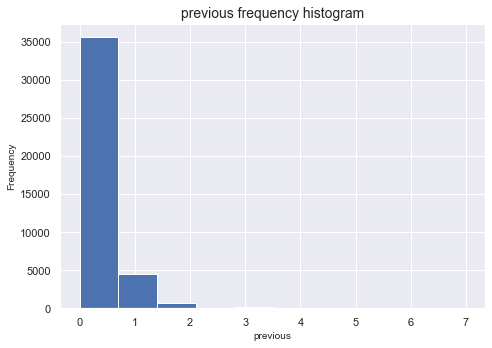

In [ ]:
#pdays
fig, ax = plt.subplots(figsize=(7,5))

a = bank_df['previous']
plt.hist(a)
plt.title('previous frequency histogram', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('previous', fontsize=10)

<h1><font color = 'orange'> Data Pre-processing <font></h1>

In [ ]:
# lọc trùng dữ liệu
bank_df.duplicated().sum()

12

In [ ]:
# Bỏ các dòng dữ liệu trùng 
bank_df = bank_df.drop_duplicates()

In [ ]:
# Kiểm tra dữ liệu
bank_df.duplicated().sum()

0

In [ ]:
# Data binning
d = {"no": 0, "yes": 1}
bank_df["y"] = bank_df["y"].map(d)
bank_df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_532\1876703695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df["y"] = bank_df["y"].map(d)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
print("Tỷ lệ thu hút khách hàng =", '{:.1%}'.format(bank_df["y"].mean()))

Tỷ lệ thu hút khách hàng = 11.3%


Đây là một chỉ số khá thấp 

In [ ]:
# Điều gì thu hút khách hàng
bank_df[bank_df["y"] == 1].mean()

age                 40.912266
duration           553.256090
campaign             2.051951
pdays              791.990946
previous             0.492779
emp.var.rate        -1.233089
cons.price.idx      93.354577
cons.conf.idx      -39.791119
euribor3m            2.123362
nr.employed       5095.120069
y                    1.000000
dtype: float64

Độ tuổi trung bình của khác hàng đồng ý đăng kí dịch vụ là 40 và cần ít nhất là 2 cuộc gọi để có thể thuyết phục họ.

In [ ]:
acd = round(bank_df[bank_df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Thời gian trung bình một cuộc gọi thu hút được khác hàng đăng kí dịch vụ là", acd_in_min, "phút", int(acd) % 60, "giây")

Thời gian trung bình một cuộc gọi thu hút được khác hàng đăng kí dịch vụ là 9.0 phút 13 giây


In [ ]:
#Bảng tổng hợp độ tuổi, công việc và thời gian đăng kí dịch vụ của khách hàng
bank_df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.186870,254.315961
blue-collar,39.555820,264.557549
entrepreneur,41.723214,263.267857
housemaid,45.500000,250.454717
management,42.362859,257.058140
retired,62.037253,273.909779
self-employed,39.949331,264.142153
services,37.925637,258.491303
student,25.894857,283.683429


## Feature Engineering

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#xóa các cột không ảnh hưởng đến việc dự đoán
bank_df=bank_df.drop(["month","day_of_week","contact"],axis=1)

#Thay các giá trị trong cột education thành dạng số
bank_df["education"]=bank_df["education"].replace(['basic.4y','high.school','basic.6y','basic.9y','professional.course','university.degree','illiterate',"unknown"],[4,12,6,9,14,17,0,-1])

#Thay các giá trị trong cột housing thành dạng số
bank_df.housing[bank_df['housing']=='no']=0
bank_df.housing[bank_df['housing']=='yes']=1
bank_df.housing[bank_df['housing']=='unknown']=-1

#Thay các giá trị trong cột loan thành dạng số
bank_df.loan[bank_df['loan']=='no']=0
bank_df.loan[bank_df['loan']=='yes']=1
bank_df.loan[bank_df['loan']=='unknown']=-1
# bank_df["loan"]=bank_df["loan"]+bank_df["housing"]
#bank_df.drop("housing",axis=1)

#Job
bank_df["job"]=bank_df["job"].replace(['unknown','unemployed','entrepreneur','blue-collar','technician','services','admin.','management','self-employed','student','housemaid','retired'],[-1,1,2,3,4,5,6,7,8,9,10,11])

bank_df["default"]=bank_df["default"].replace(['no','yes','unknown'],[0,1,-1])

bank_df["poutcome"]=bank_df["poutcome"].replace(['nonexistent','failure','success'],[0,-1,1])

bank_df['pdays'] = bank_df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))


In [ ]:
# Turning Categorical Attributes to Numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_var =['marital']
for i in cat_var:
    bank_df[i]= le.fit_transform(bank_df[i]) 

bank_df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,1,4,0,0,0,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,5,1,12,-1,0,0,149,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,5,1,12,0,1,0,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,6,1,6,0,0,0,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,5,1,12,0,0,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#bank_df = bank_df.get_dummies(bank_df, drop_first = True)

### Outlier

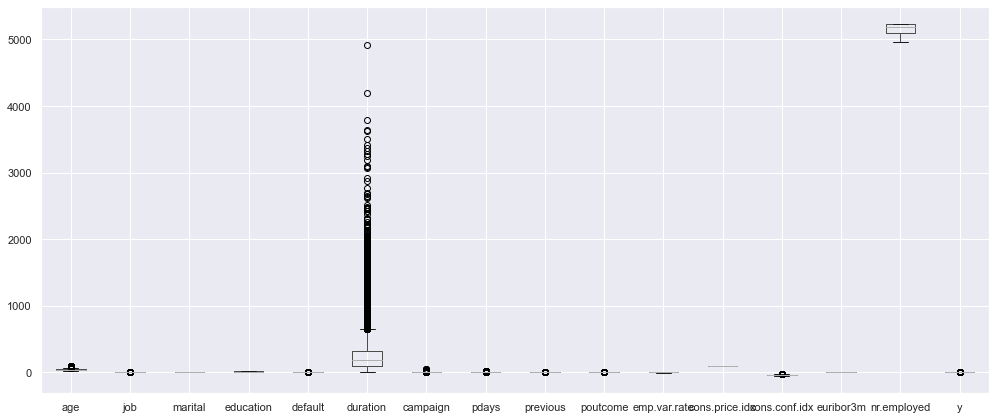

In [ ]:
# xử lý outlier để tăng độ chính xác của mô hình
plt.figure(figsize=(14,6))
bank_df.boxplot()
print()

<AxesSubplot:ylabel='cons.conf.idx'>

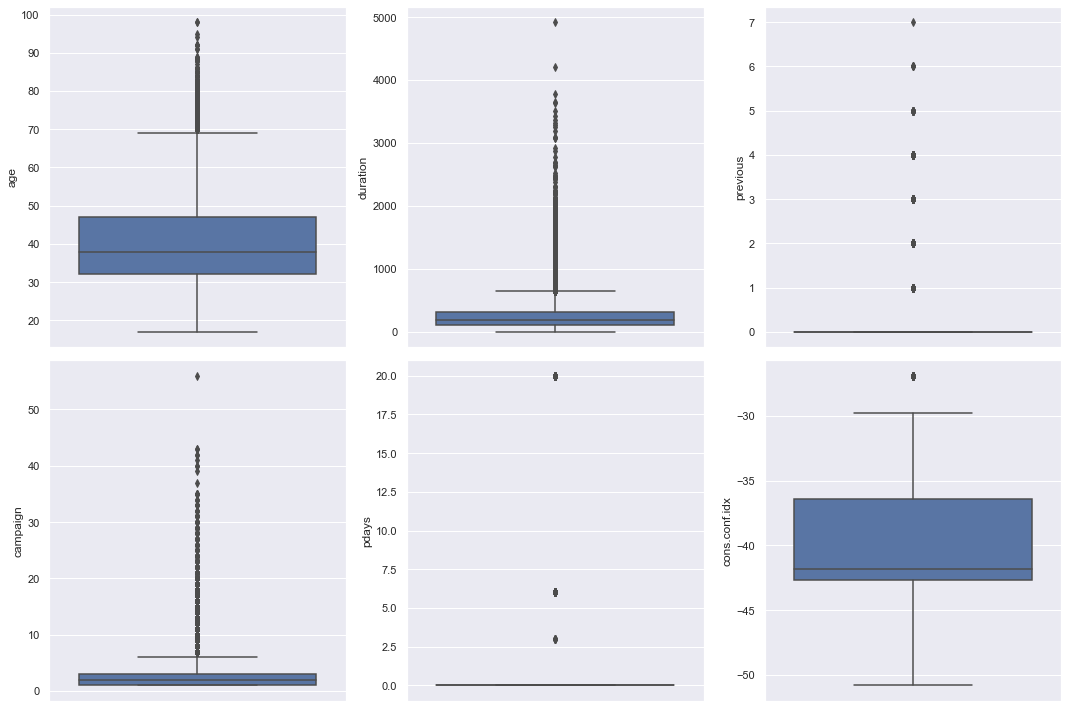

In [ ]:
#visual những features bị ảnh hưởng bỏi outlier
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
sns.boxplot(y=bank_df["age"],ax=axs[0][0])
sns.boxplot(y=bank_df["duration"],ax=axs[0][1])
sns.boxplot(y=bank_df["previous"],ax=axs[0][2])
sns.boxplot(y=bank_df["campaign"],ax=axs[1][0])
sns.boxplot(y=bank_df["pdays"],ax=axs[1][1])
sns.boxplot(y=bank_df["cons.conf.idx"],ax=axs[1][2])

In [ ]:
# xử lý outlier cho cột duration
Q1 = bank_df['duration'].quantile(.25)
Q3 = bank_df['duration'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
bank_df = bank_df[bank_df['duration'] >= lower] 
bank_df = bank_df[bank_df['duration'] <=upper] 

In [ ]:
# Xử lý outlier cho cột age
Q1 = bank_df['age'].quantile(.20)
Q3 = bank_df['age'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
bank_df = bank_df[bank_df['age'] >= lower] 
bank_df = bank_df[bank_df['age'] <=upper] 


In [ ]:
# Xử lý outlier cho cột previous

Q1 = bank_df['previous'].quantile(.20)
Q3 = bank_df['previous'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
bank_df = bank_df[bank_df['previous'] >= lower] 
bank_df = bank_df[bank_df['previous'] <=upper] 

<AxesSubplot:ylabel='cons.conf.idx'>

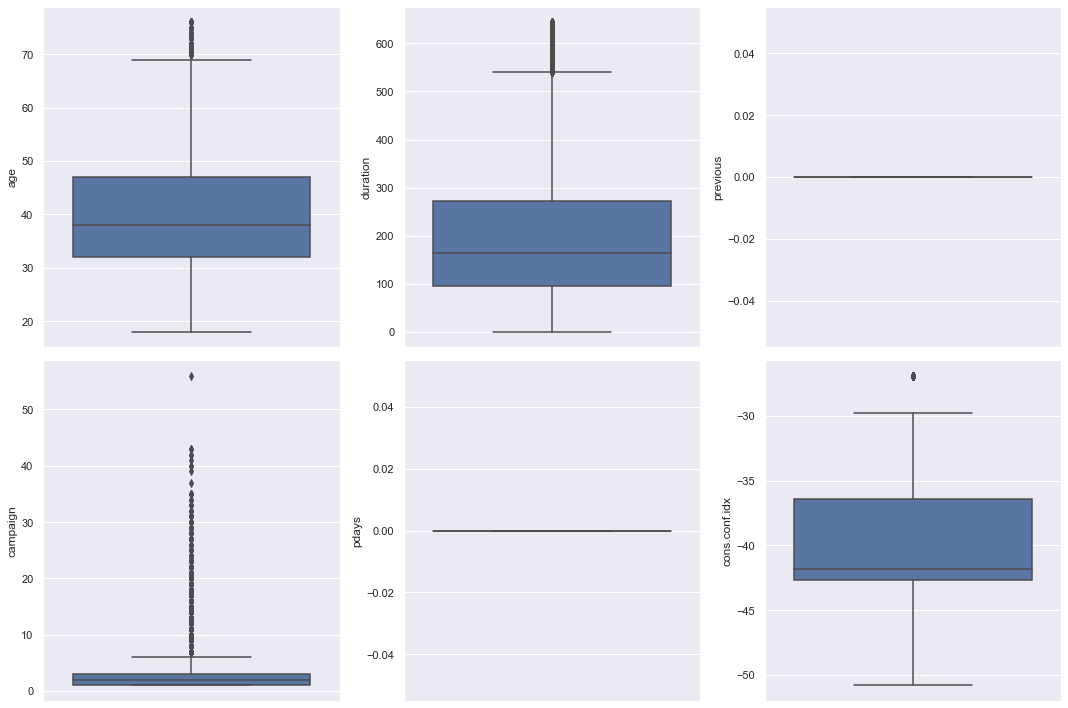

In [ ]:
#kiểm tra lại outlier
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
sns.boxplot(y=bank_df["age"],ax=axs[0][0])
sns.boxplot(y=bank_df["duration"],ax=axs[0][1])
sns.boxplot(y=bank_df["previous"],ax=axs[0][2])
sns.boxplot(y=bank_df["campaign"],ax=axs[1][0])
sns.boxplot(y=bank_df["pdays"],ax=axs[1][1])
sns.boxplot(y=bank_df["cons.conf.idx"],ax=axs[1][2])

#### Data Balancing
Cân bằng dữ liệu để tăng độ chính xác cho mô hình phân loại với biến Y có 2 giá trị là yes: 1 và no: 0

<AxesSubplot:xlabel='y', ylabel='count'>

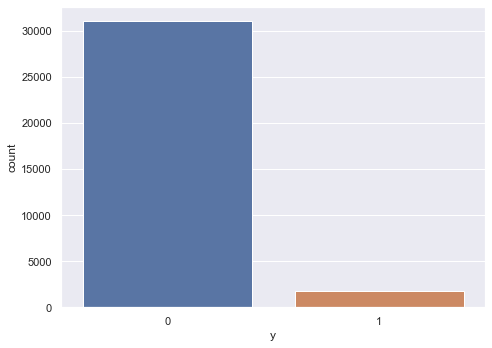

In [ ]:
# Data Balancing
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(bank_df['y'])

In [ ]:
# Chia dữ liệu thành 2 phần da số và thiểu số
df_classe_majority = bank_df[bank_df.y==0]
df_classe_minority = bank_df[bank_df.y==1]

In [ ]:
df_classe_majority.shape, df_classe_minority.shape

((31046, 18), (1810, 18))

In [ ]:
# minority class
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples = 31046,   
                                           random_state = 150) 

In [ ]:
bank_df = pd.concat([df_classe_majority, df_classe_minority_upsampled]) #ghép dữ liệu

In [ ]:
bank_df.y.value_counts() # đếm giá trị

0    31046
1    31046
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

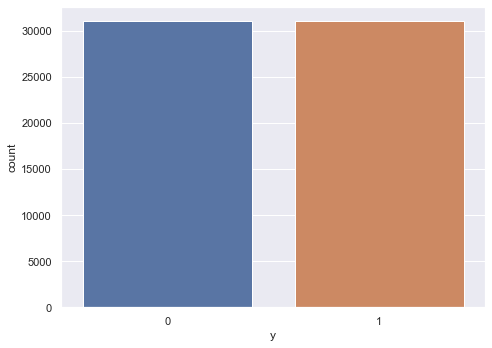

In [ ]:
# kiểm tra data balancing
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(bank_df['y']) 

In [ ]:
bank_df

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,1,4,0,0,0,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,5,1,12,-1,0,0,149,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,5,1,12,0,1,0,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,6,1,6,0,0,0,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,5,1,12,0,0,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36622,30,4,2,14,0,0,0,137,1,0,0,0,-2.9,92.963,-40.8,1.260,5076.2,1
8014,55,4,1,14,0,1,0,555,5,0,0,0,1.4,94.465,-41.8,4.865,5228.1,1
38042,69,11,1,12,0,0,0,346,3,0,0,0,-3.4,92.379,-29.8,0.773,5017.5,1
36194,24,7,2,17,0,1,0,513,9,0,0,0,-1.8,92.893,-46.2,1.270,5099.1,1


<h1><font color = 'orange'> Data Model <font></h1>

## Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split
x = bank_df.drop("y", axis=1)
y = bank_df['y']
x.sample()

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)

<h3><font color = 'Purple'> K-NN Model <font></h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

yhat = neigh.predict(x_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9768730271210462


Mô hình đạt chính xác 97%

<h3><font color = 'Green'> Decision Tree <font></h3>

In [ ]:
# Baseline: Điểm giới hạn cơ bản để dự đoán các giá trị
from sklearn import metrics
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy="stratified") #stratified: generates predictions by respecting the training sets class distribution.
baseline.fit(x_train, y_train.ravel())

DummyClassifier(strategy='stratified')

In [ ]:
accuracy_bl = baseline.score(x_train, y_train.ravel())
print("Accuracy: {0:.4f}".format(accuracy_bl))
print()

Accuracy: 0.4991



In [ ]:
# buld model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train.ravel())

dtc_predict_test = dtc.predict(x_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, dtc_predict_test, labels = [1, 0])))
print("")

accuracy_dtc = metrics.accuracy_score(y_test, dtc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, dtc_predict_test, labels = [1, 0]))

Confusion Matrix
[[7783    0]
 [ 316 7424]]

Accuracy: 0.9796

Classification Report
              precision    recall  f1-score   support

           1       0.96      1.00      0.98      7783
           0       1.00      0.96      0.98      7740

    accuracy                           0.98     15523
   macro avg       0.98      0.98      0.98     15523
weighted avg       0.98      0.98      0.98     15523



Mô hình đạt chính xác 97%

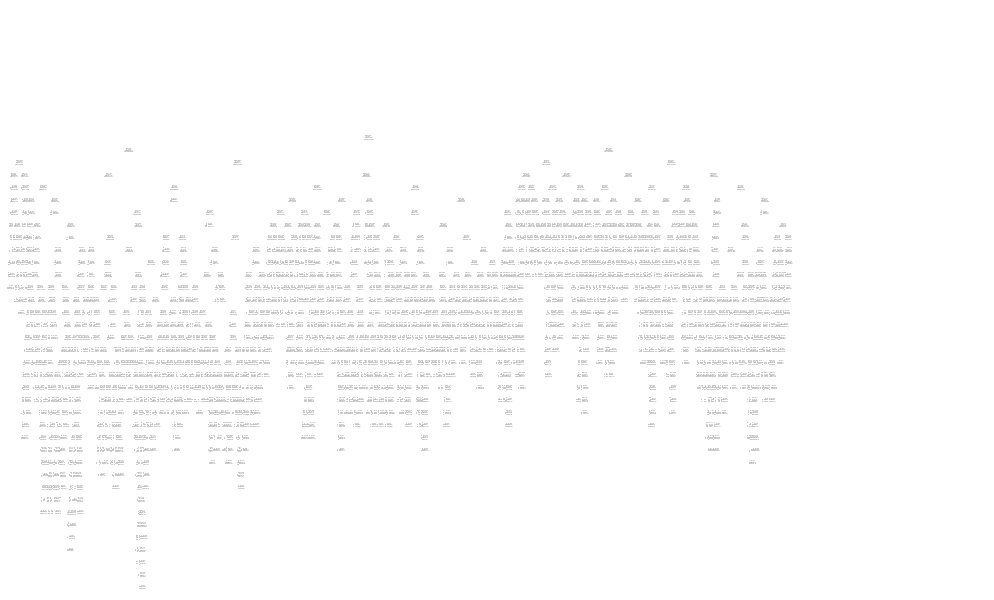

In [ ]:
#Visualize Decision tree
tree.plot_tree(dtc)
plt.show()

## Thank you!

### Author

[**Phạm Thanh Nam**](https://nampham111.wordpress.com/contact/)


### Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-07-21        | 1.0     | Nam     | up to colab    |
